In [2]:
## Import packages
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math

# make plots appear inline in the notebook
%matplotlib inline 

The code in the cell below simulates the data and plots the result. The data has the following properties:

- The `x` variable is uniformly distributed between 0.0 and 10.0.
- The `y` variable equals the `x` variable plus a Normally distributed random component. As a result, for the un-scalled data, the slope coefficient should be 1.0 and the intercept 0.0. 

Text(0.5, 1.0, 'Test Data for Regression')

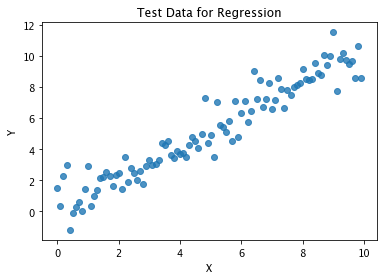

In [3]:
nr.seed(34567)
x = np.arange(start = 0.0, stop = 10.0, step = 0.1)
y = np.add(x, nr.normal(scale = 1.0, size = x.shape[0]))

# Plot data (and a linear regression model fit).
sns.regplot(x, y, fit_reg=False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Test Data for Regression')

In [5]:
## Split dataset: Randomly sample cases to create independent training and test data

nr.seed(9988)
indx = range(len(x))
indx = ms.train_test_split(indx, test_size = 50)
x_train = np.ravel(x[indx[0]])
y_train = np.ravel(y[indx[0]])
x_test = np.ravel(x[indx[1]])
y_test = np.ravel(y[indx[1]])

## Scale the feature, being sure to use the scale of the training data not the test data. 
## Avoid numeric range of a feature being harmful to ML model.
## Using Z-Score normalization provided from StandardScalar()

scaler = preprocessing.StandardScaler().fit(x_train.reshape(-1,1))
x_train = scaler.transform(x_train.reshape(-1,1))     
y_train = scaler.transform(y_train.reshape(-1,1))


intercept: [0.08516893]
coefficient: [[1.03285118]]


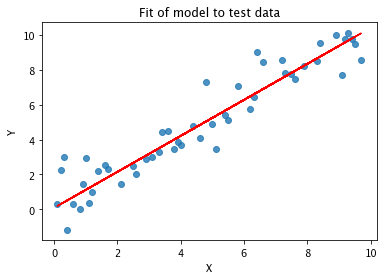

In [8]:
## Define and fit the linear regression model

lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train.reshape(-1,1), y_train)

y_score = lin_mod.predict(x_test.reshape(-1,1)) 

print('intercept: ' + str(lin_mod.intercept_))
print('coefficient: ' + str(lin_mod.coef_))

def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_score, c = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fit of model to test data')

plot_regression(x_test, y_score, y_test)

Mean Square Error      = 1.0178480188322825
Root Mean Square Error = 1.008884541873986
Mean Absolute Error    = 0.763059846639255
Median Absolute Error  = 0.6031435928079797
R^2                    = 0.8979014436983853
Adjusted R^2           = 0.7914582679796807


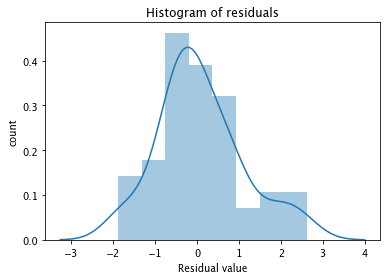

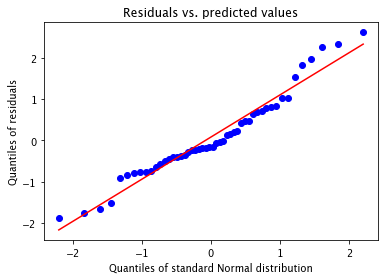

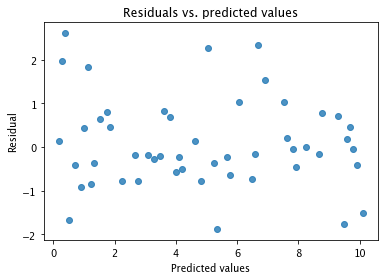

In [13]:
## Evaluate the model
## Those evaluation metrics are functions of residual value.

def print_metrics(y_true, y_predicted, n_parameters):    
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    

def hist_resids(y_test, y_score):    
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots -- a kernel density plot and histogram of the residuals of the regression model
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots -- Quantile-Quantile Normal plot
    '''
    This plot displays quantiles of a standard Normal distribution on the horizontal axis 
    and the quantiles of the residuals on the vertical axis. 
    If the residuals were perfectly Normally distributed, these points would fall on a straight line. 
    In real-world problems, you should expect the straight line relationship to be approximate.
    '''
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    plt.show()
     

def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots -- residual plot
    '''
    For an ideal regression model the variance or dispersion of the residuals should not change 
    with the values of the predicted values. 
    It has been said that the ideal residual plot should look like a 'fuzzy caterpillar' 
    with no change vs. the predicted value.
    The dispersion is reasonably constant over the range of the predicted value.
    '''
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()


    
print_metrics(y_test, y_score, 2)  
    
hist_resids(y_test, y_score) 

resid_qq(y_test, y_score) 

resid_plot(y_test, y_score) 